In [15]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import sys
sys.path.append('/work-zfs/abattle4/heyuan/tools/python3_lib/lib/python3.6/site-packages/')


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.stats as stats

import seaborn as sns

from Correct_peaks import *

In [2]:
PEAK_DIR = '/work-zfs/abattle4/heyuan/Variant_calling/datasets/GBR/ATAC_seq/alignment_bowtie/Peaks/'
BAM_DIR = '/work-zfs/abattle4/heyuan/Variant_calling/datasets/GBR/ATAC_seq/alignment_bowtie/first_pass_bqsr'

In [5]:
[centered_data, bam_DF, samples] = read_in_peaks(permute = True)
[corrected_data, pca_model] = remove_PCs(centered_dat = centered_data[samples], PCA_k=10)

Read in Peak and convert to RPKM
Compute RPKM


In [9]:
centered_data.head()

,PEAK,CHR,START,END,HG00113,HG00246,HG00106,HG00138,HG00112,HG00247,...,HG00136,HG00155,HG00263,HG00156,HG00135,HG00120,HG00143,HG00157,HG00121,HG00142
0,Peak1,1,16019,16819,0.184867,0.505321,-0.543673,0.664037,1.750686,-1.174987,...,1.501086,1.613358,0.117244,-1.244452,0.706303,-1.110772,-0.050154,-0.706303,-0.288018,-0.664037
1,Peak2,1,28870,29662,-0.841621,0.543673,0.749869,-1.932212,0.505321,-0.016712,...,0.358459,1.050837,0.218979,-0.050154,1.932212,-0.749869,-0.467699,-1.405072,-0.150969,-0.117244
2,Peak3,1,265673,266353,0.794909,-0.841621,1.050837,0.253347,2.216363,0.218979,...,0.941075,-0.794909,-0.706303,-0.543673,-1.405072,-0.253347,0.664037,0.841621,-0.394336,-1.050837
3,Peak4,1,267734,268295,-0.841621,0.323038,0.543673,-0.288018,-1.320504,-0.050154,...,0.467699,1.244452,-0.430727,1.750686,1.932212,-0.543673,0.050154,0.622926,0.218979,0.117244
4,Peak5,1,629625,630407,-1.405072,0.794909,-0.794909,0.218979,-1.750686,0.941075,...,-0.358459,2.216363,-0.582842,0.505321,-0.543673,-0.430727,-0.150969,0.749869,0.050154,-1.501086


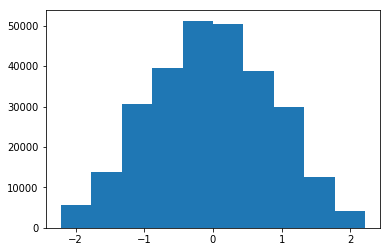

In [6]:
plt.figure()
plt.hist(centered_data[samples[6]])
plt.show()
plt.close()

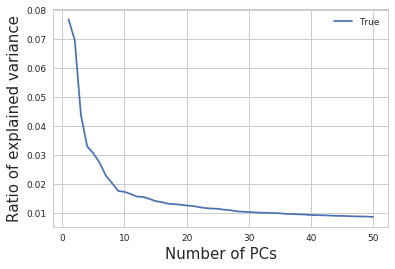

In [7]:
pca = PCA(n_components=50)
pca.fit(centered_data[samples].transpose())

from matplotlib import pyplot as plt

sns.set(font_scale=0.9)
sns.set_style('whitegrid')

plt.figure()
plt.plot(range(1, 51), pca.explained_variance_ratio_[:50], label = 'True')

plt.legend()
plt.xlabel('Number of PCs',size=15)
plt.ylabel('Ratio of explained variance', size = 15)
plt.show()
plt.close()

In [8]:
from sklearn.linear_model import LinearRegression
if 1:
    PCA_k = 10
    pcs = pca.transform(centered_data[samples].transpose())
    
    reg = LinearRegression().fit(pcs[:, :PCA_k], centered_data[samples].transpose())
    dat = centered_data[samples] - np.dot(reg.coef_, pcs[:, :PCA_k].transpose())


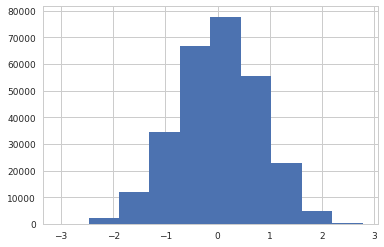

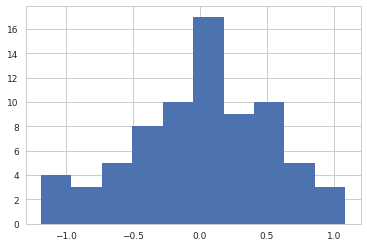

In [9]:
plt.figure()
plt.hist(dat[samples[5]])
plt.show()
plt.close()

plt.figure()
plt.hist(dat[samples].iloc[1231])
plt.show()
plt.close()

In [10]:
for col in ['PEAK','CHR', 'START', 'END']:
    dat[col] = centered_data[col]

In [14]:
#centered_data[samples].to_csv('%s/peak_by_sample_matrix_RPKM_corrected.txt' % (PEAK_DIR), sep='\t')

for i in range(22,23):
    print(i)
    df_save = dat[dat['CHR'] == i]
    df_save.to_csv('%s/peak_by_sample_matrix_RPKM_corrected_chromosome%d.txt' % (PEAK_DIR, i), sep='\t', index = False)
    df_save[['PEAK'] + samples].to_csv('%s/peak_by_sample_matrix_RPKM_corrected_chromosome%d_values.txt' % (PEAK_DIR, i), sep='\t', index = False)
    df_save[['PEAK','CHR', 'START', 'END']].to_csv('%s/peak_by_sample_matrix_RPKM_corrected_chromosome%d_loc.bed'% (PEAK_DIR, i), sep='\t', index=False)

22


In [13]:
df_save.head()

,HG00096,HG00098,HG00101,HG00102,HG00103,HG00105,HG00106,HG00107,HG00108,HG00109,...,HG00264,HG00265,HG01789,HG01790,HG01791,HG02215,PEAK,CHR,START,END
274487,0.146381,-1.508869,-0.687558,0.203006,0.589470,-0.321853,-0.582892,1.157584,0.160400,1.123149,...,-0.448294,-1.243967,-0.593036,0.067679,-0.088572,0.194639,Peak274739,22,15881028,15882174
274488,0.066938,-0.384506,1.352541,-0.783229,0.929015,0.472737,-0.419629,0.798033,0.822962,-0.140953,...,-0.073866,-0.994623,-1.030900,-0.198794,0.053486,1.600652,Peak274740,22,15871166,15872051
274489,0.554465,-0.213885,0.280520,-1.559696,-0.585558,1.346639,-0.503129,1.311954,1.345538,0.162052,...,-0.124657,0.630281,-0.624519,0.718034,1.022820,-0.077690,Peak274741,22,15810981,15811642
274490,0.126785,0.190761,0.680684,-0.208159,-0.804455,1.319965,-1.222379,0.161529,-1.194418,1.134042,...,-0.681452,0.546044,-0.986326,0.950218,1.826429,-0.085213,Peak274742,22,15785178,15785896
274491,-0.726864,0.174281,0.331714,-1.853481,0.469187,0.400321,-0.835650,0.480118,1.068623,-1.208393,...,-1.115617,-0.759359,0.336317,-1.411756,1.340575,0.251239,Peak274743,22,15689100,15689895


In [21]:
pca_save = pcs[:, :PCA_k].transpose()
pca_save = pd.DataFrame(pca_save)
pca_save.index = ['PC%d' % i for i in range(1, PCA_k+1)] 
pca_save.columns = samples
pca_save.to_csv('%s/PCs.txt' % PEAK_DIR, sep='\t')

In [12]:
### Examine peaks from each sample that overlap with the union set of peaks

sum_overlap_bp = []
for s in samples:
    overlap_dat = pd.read_csv('%s/%s_overlap_with_union_set.bed' %(PEAK_DIR, s), 
                              header = None, sep='\t', usecols=[8])
    sum_overlap_bp.append(np.sum(overlap_dat[8]))

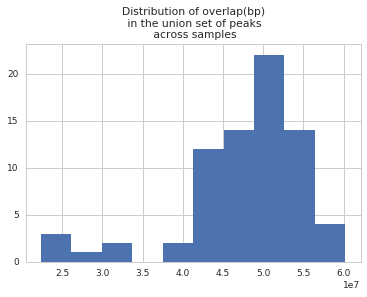

In [17]:
plt.figure()
plt.hist(sum_overlap_bp)
plt.title('Distribution of overlap(bp)\n in the union set of peaks\n across samples')
plt.show()
plt.close()

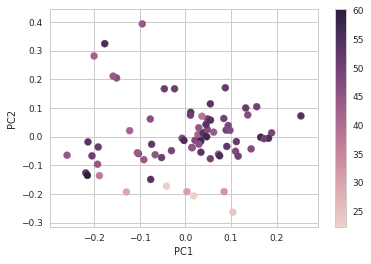

In [42]:
import seaborn as sns

df_plot = pd.DataFrame({"pc1": pca.components_[0,:], 
                        "pc2": pca.components_[1,:], 
                        "overlap_bp": np.array(sum_overlap_bp) / 1e6})

cmap = sns.cubehelix_palette(as_cmap=True)

f, ax = plt.subplots()
points = ax.scatter(df_plot['pc1'], 
                    df_plot['pc2'], 
                    c=df_plot['overlap_bp'], 
                    s=50, 
                    cmap=cmap)
f.colorbar(points)

plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()
plt.close()

In [11]:
from sklearn.linear_model import LinearRegression

def remove_PCs(PCA_k, centered_dat):
    
    RPKM_DF = pd.read_csv('%s/peak_by_sample_matrix_RPKM.txt' % (PEAK_DIR), sep=' ')
    
    pca = PCA(n_components=50)
    pca.fit(centered_dat)

    reg = LinearRegression().fit(pca.components_[:PCA_k, :].transpose(), centered_dat.transpose())
    corrected_dat = centered_dat - np.dot(reg.coef_, pca.components_[:PCA_k, :])

    corrected_dat = pd.DataFrame(corrected_dat)
    corrected_dat.columns = samples
    corrected_dat['CHR'] = np.array(RPKM_DF['CHR'])
    corrected_dat['START'] = np.array(RPKM_DF['START'])
    corrected_dat['END'] = np.array(RPKM_DF['END'])
    corrected_dat['PEAK'] = np.array(RPKM_DF['PEAK'])
    corrected_dat = corrected_dat[['PEAK', 'CHR', 'START', 'END']  + samples]
    
    return corrected_dat

In [43]:
corrected_dat = remove_PCs(PCA_k=10, centered_dat = norm_df)
for CHROMOSOME in range(1,23):
    print('chromosome%d' % CHROMOSOME)
    corrected_peak_chr = corrected_dat[corrected_dat['CHR'] == CHROMOSOME]
    corrected_peak_chr.to_csv('%s/peak_by_sample_matrix_corrected_chr%d.txt' % (PEAK_DIR, CHROMOSOME), sep='\t', index = False)
    
    

chromosome1
chromosome2
chromosome3
chromosome4
chromosome5
chromosome6
chromosome7
chromosome8
chromosome9
chromosome10
chromosome11
chromosome12
chromosome13
chromosome14
chromosome15
chromosome16
chromosome17
chromosome18
chromosome19
chromosome20
chromosome21
chromosome22


In [95]:
### Correct FPKM from the paper

fpkm = pd.read_csv('/work-zfs/abattle4/heyuan/Variant_calling/datasets/GBR/Zenodo/log_fpkm.tsv', sep='\t')
fpkm['Peak'] = ['Peak%d'%x for x in np.array(fpkm['Peak'])]
fpkm = fpkm.set_index('Peak')
fpkm.head()

,HG00096,HG00097,HG00098,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,...,HG00261,HG00262,HG00263,HG00264,HG00265,HG01334,HG01789,HG01790,HG01791,HG02215
Peak,,,,,,,,,,,,,,,,,,,,,
Peak1,1.695769,1.570533,1.490504,1.703762,1.688359,1.330474,1.685836,1.773021,2.159967,1.239699,...,1.952655,1.668954,1.641891,1.117770,1.291020,1.380126,1.312324,1.776550,1.758983,1.398048
Peak2,-0.344096,-0.701356,0.080531,0.178028,-0.268069,0.115879,0.168823,-0.468186,-0.040945,-0.488464,...,0.006590,-0.228624,0.111615,-0.161592,-0.148619,-0.690486,-0.510854,0.174147,-0.285877,-0.426381
Peak3,0.318571,0.078653,0.394784,1.056443,0.323115,0.131788,0.183197,-0.068568,0.258109,0.241638,...,-0.218414,0.531880,0.492945,-0.470453,-0.200327,0.182581,-1.005384,0.134326,-0.189854,-0.145337
Peak4,0.881884,0.923832,1.057201,1.083935,0.807853,0.434909,0.946906,0.574677,0.918121,0.558139,...,1.215647,1.446861,1.238560,0.690928,0.538989,0.809185,0.463111,1.736516,1.116732,1.647839
Peak5,1.140135,1.884047,1.296269,0.749717,1.078967,1.455144,1.279002,1.245555,1.298612,1.378742,...,0.275345,1.421700,1.701907,0.898224,0.969189,1.470762,0.884302,1.785113,1.336738,1.687654


In [28]:
scaler = StandardScaler()
centered_fpkm = scaler.fit_transform(fpkm)

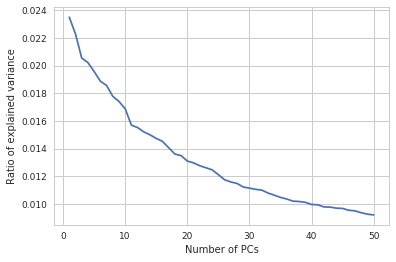

In [34]:
pca = PCA(n_components=50)
pca.fit(centered_fpkm.transpose())

plt.figure()
plt.plot(range(1,51), pca.explained_variance_ratio_)
plt.xlabel('Number of PCs')
plt.ylabel('Ratio of explained variance')
plt.show()

In [36]:
pca.components_.shape

(50, 277128)

In [96]:
peak_ID = pd.read_csv('//work-zfs/abattle4/heyuan/Variant_calling/datasets/GBR/Zenodo/peaks_loc_GRCh38.bed', sep='\t', header=None)
peak_ID.head()

,0,1,2,3
0,1,16019,16819,Peak2
1,1,28870,29662,Peak3
2,1,265673,266353,Peak4
3,1,267734,268295,Peak5
4,1,629625,630407,Peak7


In [97]:
RPKM_dat = pd.read_csv('%s/peak_by_sample_matrix_RPKM.txt' % (PEAK_DIR), sep=' ')
samples = [x for x in RPKM_dat.columns if x.startswith('HG')]

In [98]:
save_dir = '/work-zfs/abattle4/heyuan/Variant_calling/datasets/GBR/ATAC_seq/alignment_bowtie/Peaks/Zenodo/'
fpkm = fpkm.loc[peak_ID[3]]
for k in range(1,23):
    peak_ID_save =  peak_ID[peak_ID[0] == str(k)]
    fpkm_save = fpkm.loc[peak_ID_save[3]]
    
    peak_ID_save[[3,0,1,2]].to_csv('%s/chromosome%d_loc.bed' % (save_dir, k), sep='\t', index = False)
    fpkm_save[samples].to_csv('%s/chromosome%d_corrected_fpkm.txt' % (save_dir, k), sep='\t')

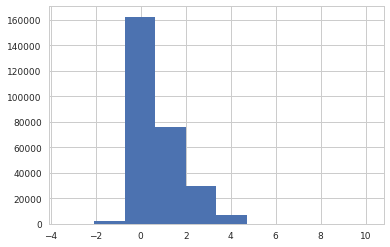

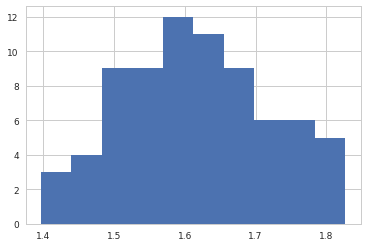

In [144]:
plt.figure()
plt.hist(fpkm[samples[5]])
plt.show()
plt.close()


plt.figure()
plt.hist(fpkm[samples].iloc[1231])
plt.show()
plt.close()